#Exploratory Data Analysis

###Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Connecting to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the Data

In [4]:
#reading the segmentations of the train data
train_segmentation = pd.read_csv("/content/drive/MyDrive/airbusshipdetection/train_ship_segmentations_v2.csv")

### Extracting Features

In [5]:
#changing the EncodedPixels column to string
train_segmentation['EncodedPixels'] = train_segmentation['EncodedPixels'].astype("string")

In [6]:
def add_new_features(x: pd.Series) -> pd.Series:
    #assigning the height, width, and number of channels of the image
    img = np.zeros((768, 768, 3))
    x['Img_Height'], x['Img_Width'], _ = img.shape
    return x

In [7]:
#apply the add_new_features function to each row of train_segmentation Dataframe
train_segmentation = train_segmentation.apply(lambda x: add_new_features(x), axis=1)

In [8]:
def num_EncodedPixels(EncodedPixels: str) -> int:
    #If EncodedPixels is NaN, the function returns 0.
    if pd.isna(EncodedPixels):
        return 0
    #If EncodedPixels is not NaN, split the string using whitespace as delimiter
    #select every second element starting from index 1 ([1::2]) and convert to an array of integers
    #Finally, the sum of the integers in the array is returned.
    return np.array(EncodedPixels.split()[1::2], dtype=int).sum()

In [9]:
#divide the number of ship pixels by the product of 'Img_Height' and 'Img_Width'
#to get the ship area as a fraction of the total image area.
train_segmentation['percentage_ship_area'] = train_segmentation.apply(
    lambda x: num_EncodedPixels(x['EncodedPixels']) / (x['Img_Height'] * x['Img_Width']) * 100, axis=1)

## Removing the Corrupted images

In [10]:
#check the information for the corrupted images specifically.
img_list = ['6384c3e78.jpg']
corrupted_rows = train_segmentation[train_segmentation['ImageId'].isin(img_list)]
corrupted_rows

,ImageId,EncodedPixels,Img_Height,Img_Width,percentage_ship_area
90158,6384c3e78.jpg,<NA>,768,768,0.0


In [11]:
#delete the corrupted image.
train_segmentation = train_segmentation.drop(corrupted_rows.index)

### Data Exploration

In [12]:
print(f'Number of rows in the data - {train_segmentation.shape[0]}')

Number of rows in the data - 231722


In [13]:
#preview of the data in train_segmentation
train_segmentation.head(20)

,ImageId,EncodedPixels,Img_Height,Img_Width,percentage_ship_area
0,00003e153.jpg,<NA>,768,768,0.000000
1,0001124c7.jpg,<NA>,768,768,0.000000
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,768,768,0.574409
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,768,768,0.030009
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,768,768,0.025092
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,768,768,0.081380
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...,768,768,0.001187
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...,768,768,0.109863
8,0001b1832.jpg,<NA>,768,768,0.000000
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,768,768,0.067817


In [14]:
#calculating the number of unique images in the 'ImageId' column of the 'train_segmentation'
num_train = train_segmentation['ImageId'].nunique()
display(f'Number of Train Images - {num_train}')

'Number of Train Images - 192555'

### Number of ships

In [15]:
#calculate the number of images in 'train_segmentation' that do not have ship annotations
no_ships = train_segmentation['EncodedPixels'].isna().sum()
display(f'Number of images without ships - {no_ships}')

'Number of images without ships - 149999'

In [16]:
#if 'EncodedPixels' is NaN, the value is set to 0; otherwise, it is set to 1.
train_segmentation['NumberOfShips'] = train_segmentation.apply(lambda x: 0 if pd.isna(x['EncodedPixels']) else 1, axis=1)
count_ships = train_segmentation[['ImageId','NumberOfShips']].groupby(['ImageId']).sum()
ship_counts = count_ships.value_counts()
print(ship_counts)

NumberOfShips
0                149999
1                 27104
2                  7674
3                  2954
4                  1622
5                   925
6                   657
7                   406
8                   318
9                   243
10                  168
11                  144
12                  124
14                   76
13                   75
15                   66
dtype: int64


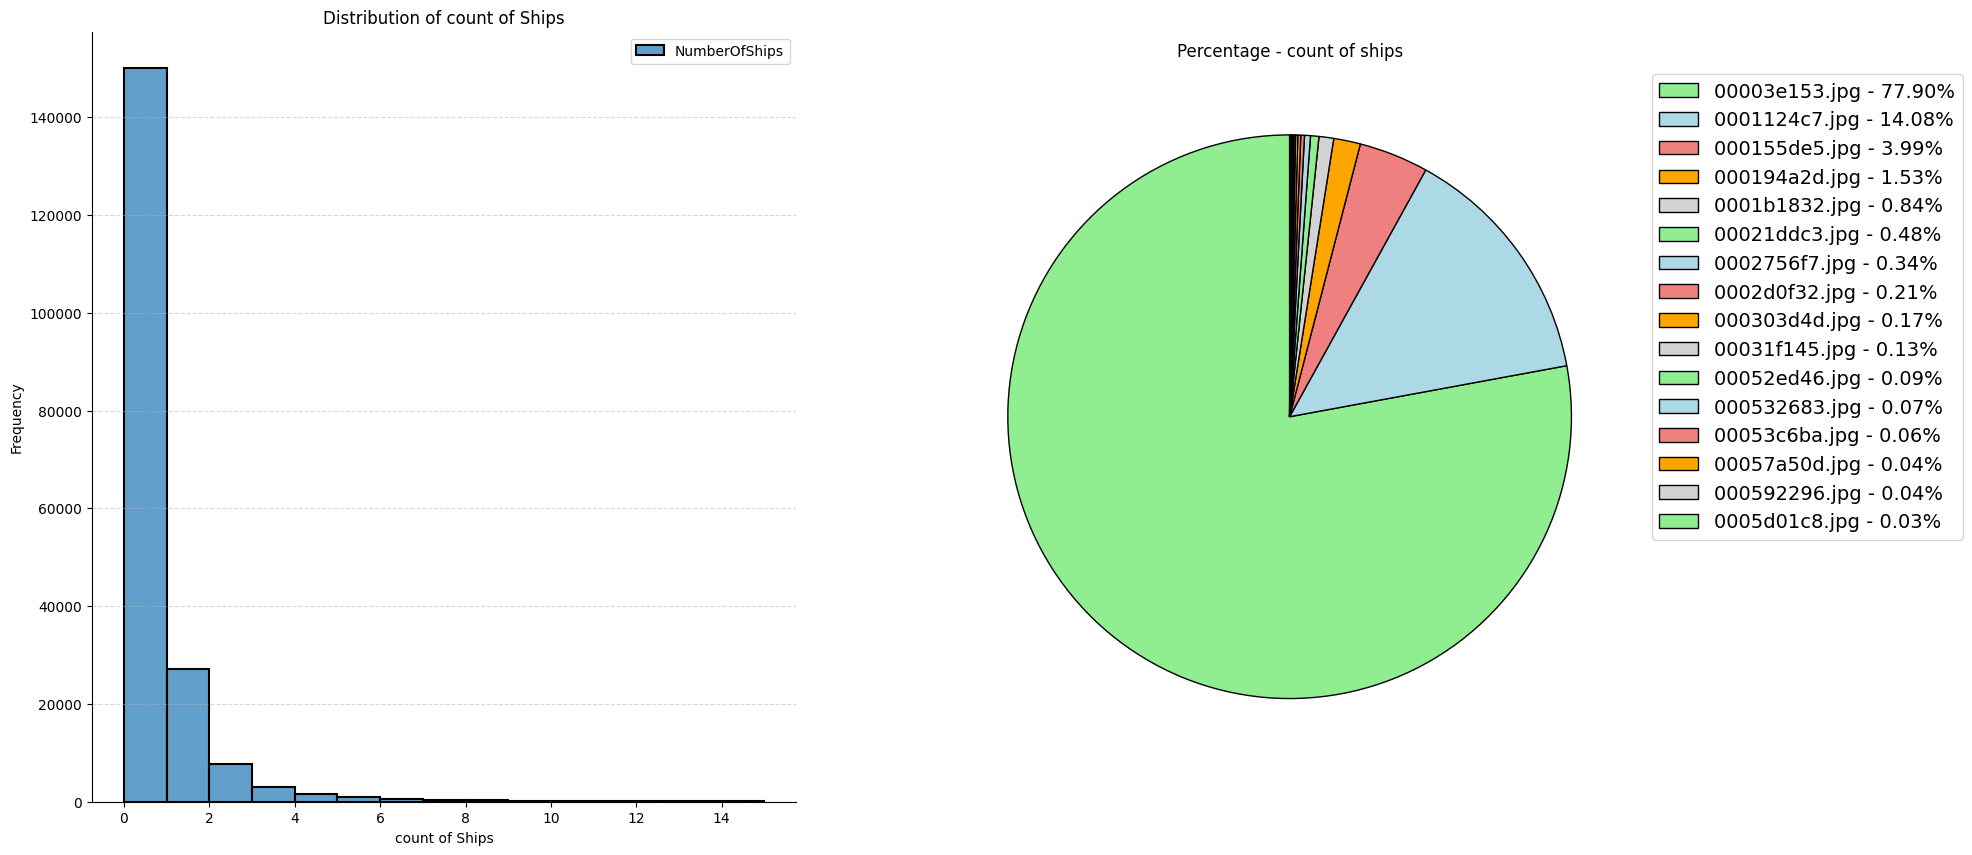

In [21]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
#calculate the count of each ship count value in 'ships_numbers' and calculates the corresponding percentage.
percent = 100.*ship_counts/ship_counts.sum()
# Plotting histogram
sns.histplot(data=count_ships, bins=15, ax=ax[0], color='#DAF7A6', edgecolor='black', linewidth=1.5, alpha=0.7)
ax[0].set_xlabel('count of Ships')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of count of Ships')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
labels = ['{0} - {1:1.2f}%'.format(label, count) for label, count in zip(count_ships.index, percent)]
colors = ['lightgreen', 'lightblue', 'lightcoral', 'orange', 'lightgray']  # Custom colors
border_color = 'Black'
border_width = 1
wedgeprops = {'linewidth': border_width, 'edgecolor': border_color}
ax[1].pie(ship_counts, colors=colors, startangle=90, wedgeprops=wedgeprops)
ax[1].legend(bbox_to_anchor=(1., 1.), labels=labels, fontsize=14)
ax[1].set_title('Percentage - count of ships')

plt.show()



* Approximately 78% of the images do not have any ships.
* Around 14% of the images have only one ship.
* The remaining 8% of the images contain 2 to 15 ships.




## Ship Area Distribution

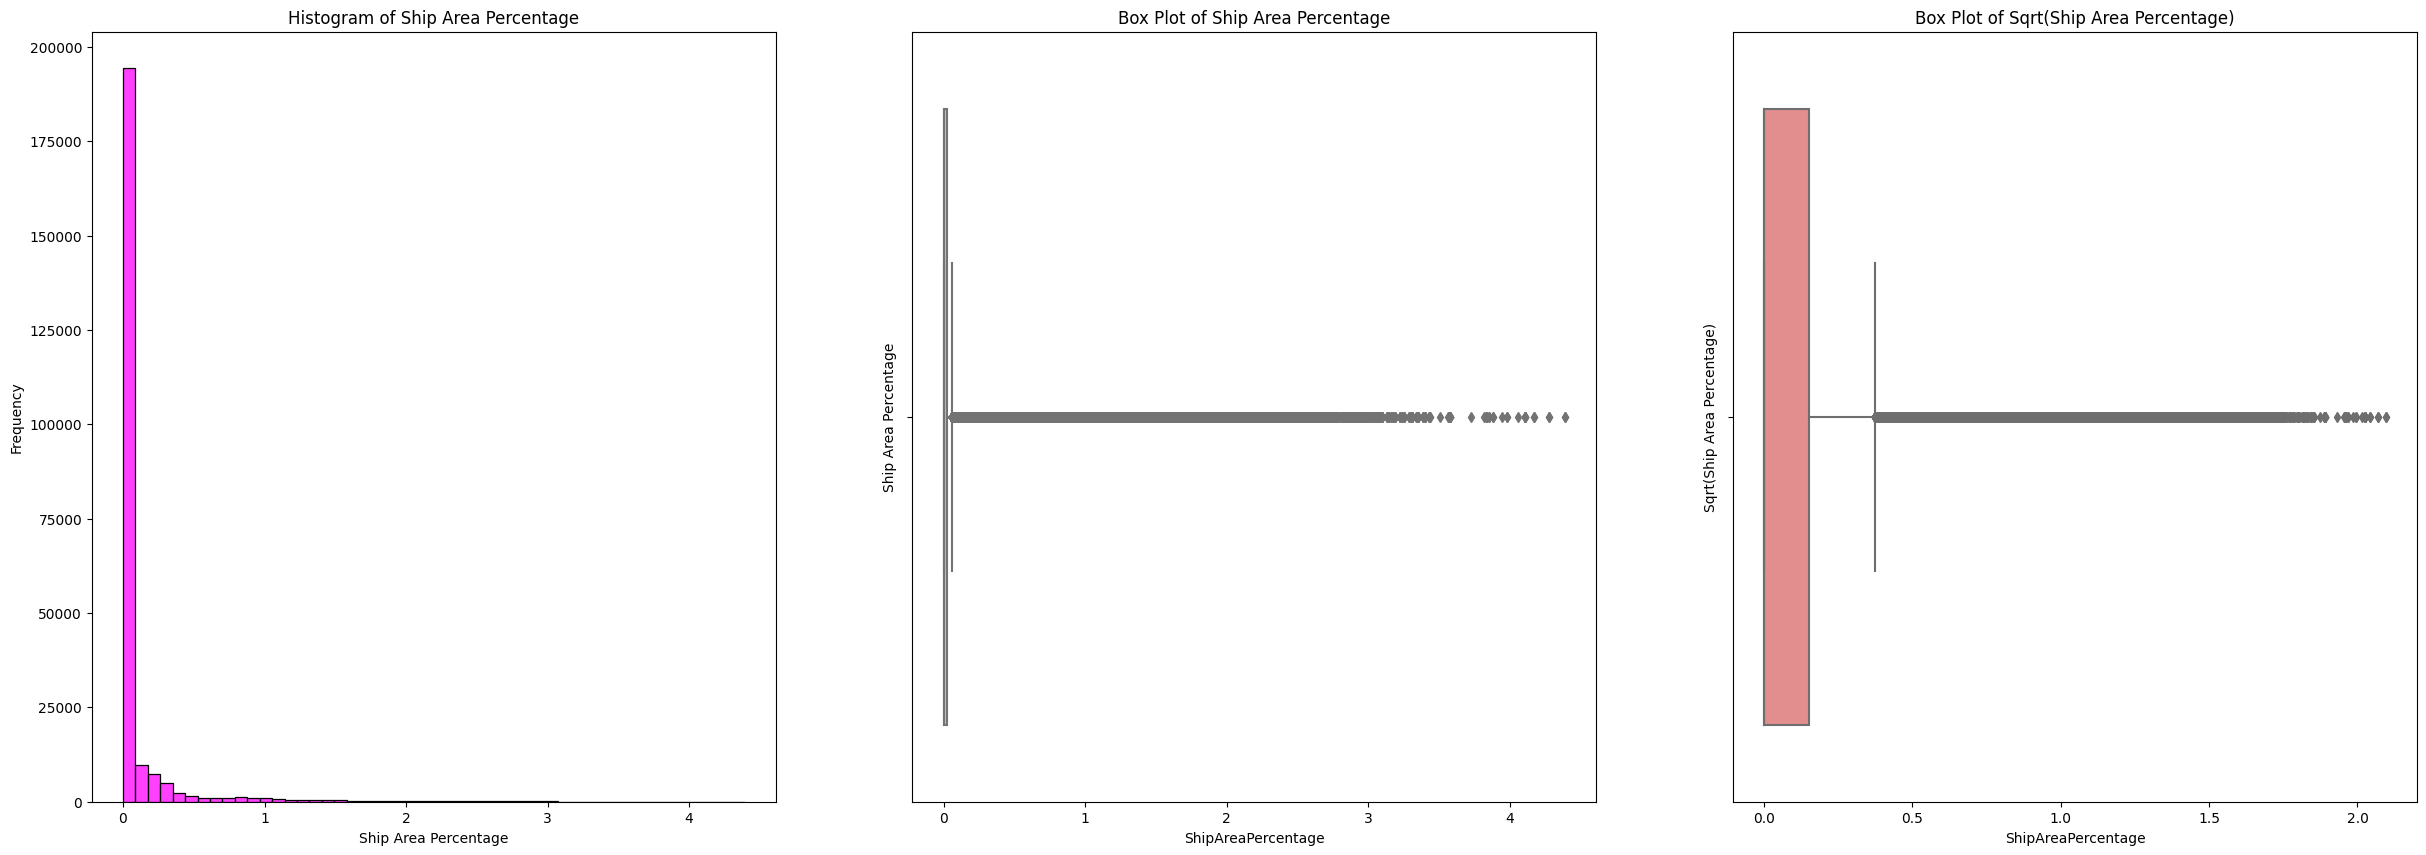

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# Plotting histogram
sns.histplot(data=train_segmentation, x='percentage_ship_area', bins=50, ax=ax[0],color='magenta')
ax[0].set_xlabel('Ship Area Percentage')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Ship Area Percentage')

# Plotting box plot
sns.boxplot(data=train_segmentation['percentage_ship_area'], ax=ax[1],color='lightgreen', orient='h')
ax[1].set_ylabel('Ship Area Percentage')
ax[1].set_xlabel('ShipAreaPercentage')
ax[1].set_title('Box Plot of Ship Area Percentage')

# Plotting box plot with square root transformation
sns.boxplot(data=train_segmentation['percentage_ship_area'].apply(lambda x: x ** 0.5), ax=ax[2],color='lightcoral',orient='h')
ax[2].set_ylabel('Sqrt(Ship Area Percentage)')
ax[2].set_xlabel('ShipAreaPercentage')
ax[2].set_title('Box Plot of Sqrt(Ship Area Percentage)')

labels = [f'{tick.get_text()}%' for tick in ax[1].get_yticklabels()]
ax[1].set_yticklabels("")

labels = [f'{tick.get_text()}%' for tick in ax[2].get_yticklabels()]
ax[2].set_yticklabels("")
plt.show()

## Insights
* Ship Presence: The majority of the images (78%) do not contain any ships. This indicates that ships are relatively less in the dataset.

* Ship Size: For the images that do contain ships, all the ships occupy a very small portion of the image, approximately 0.1%. This suggests that ships are generally small objects within the images, and the majority of the image is occupied by the background.
